# Introduction to machine learning and `scikit-learn`

### 2020-05-26, Heidelberg. By Nikolaos "Niko" Papadopoulos

This is the notebook that Niko "live" programmed for the session. It contains the thought process, the code, and the plots.

First we import the necessary libraries:

In [1]:
import numpy as np # for data wrangling and operations
import matplotlib.pyplot as plt # for visualisation
import matplotlib.colors
from matplotlib.colors import ListedColormap # we need this to get frisky with color maps
from sklearn import neighbors, datasets, linear_model, svm # the estimators & data that we are gonna use

## 1. Load and love the data

Let's load the `iris` dataset. It contains measurements for the flowers of three species of [_Iris_ plants](https://en.wikipedia.org/wiki/Iris_(plant)), namely petal and sepal length & width.

In [2]:
iris = datasets.load_iris()

We can learn more about the dataset by querying its `DESCR` attribute. In general, getting familiar with your data is a very important task in machine learning, because it prepares you for all the problems that you will encounter. Take some time to explore the different attributes of the `iris` object (type `iris.` and press tab!).

---
## BOX 1: LEARN THE DATA

Here are some questions that you should be able to answer about your data. This is a minimal set that Niko came up with - not an all-encompassing atlas, but it gives you an idea of what you should be asking yourself.

- How was the data collected?
- How many features does every data point have?
- What type of features do I have (categorical/continuous)?
- Do my features have units? Are all features in the same unit? Does it make sense to convert features to same unit?
- Are my features comparable to each other? Are they of the same type?
- Do I have missing values? How are they encoded (0/None/NaN)? What does this mean?
- What are typical values for each feature?
- What are the ranges of possible values for each feature?
- Were all data points generated under the **exact** same conditions?
- Are all data points unique?
- Do I have replicates of some sort?
- Has the data been pre-processed in some way or do I have raw values?

Typical data exploration techniques include calculating summary statistics for each feature, making histograms of feature values, or scatter plots of one feature against another.

---

The two most interesting attributes of the `iris` object are the `data` and the `target` slots. The `data` attribute contains (surprise) the actual data: A table of 150 x 4 floats that represent measurements of the features (see `iris.feature_names`). The `target` attribute contains an array with the class of each sample; the labels of our data (see `iris.target_names`).

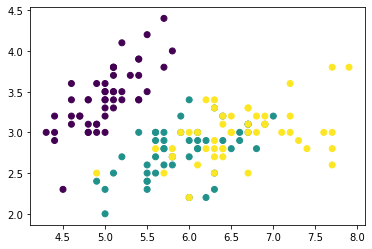

In [3]:
fig, ax = plt.subplots()
ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)

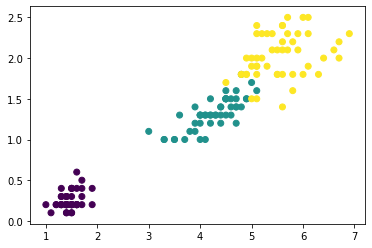

In [4]:
fig, ax = plt.subplots()
ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)

Based on the scatter plots we notice that the three classes seem to be reasonably well separated from each other even when only using two features! We are going to use all four anyway :D

To avoid typing `iris.data` each time, and to stick to `scikit-learn` notation, we are going to name our data `X` and our labels `y`. This is in tune with mathematical notation, where functions are usually written $f(X) = y$.

In [5]:
X = iris.data
y = iris.target

Remember that in machine learning we are using estimators to get an interpretation of the data. In this example, we would wish to predict the _Iris_ species of a plant specimen given its petal & sepal length/width. Our hope is (and the scatter plots seem to confirm it) that there is enough information in the flower shape to actually do that. We will take one of `sklearn`'s most naive estimators, a k-nearest neighbour classifier. 

When given a point, it will retrieve the $k$ nearest labeled neighbours of the point and take a majority vote on the class. In our case, given a flower shape, it will try to find the $k$ most similar flower shapes, and see which _Iris_ species is the most prevalent among those. This must therefore be the best guess for our input flower!

In [6]:
# define the estimator
k_neighb = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the estimator so that the parameters are tuned by the data we have
k_neighb.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

We can now ask the estimator to predict the value of a new flower. Let's take the average _Iris setosa_ and see how well the classifier does!

In [8]:
all_setosas = X[y == 0]
avg_setosa = np.mean(all_setosas, axis=0)

In [9]:
avg_setosa

array([5.006, 3.428, 1.462, 0.246])

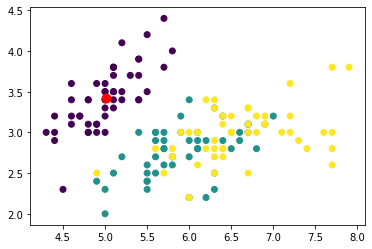

In [10]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y)
ax.scatter(avg_setosa[0], avg_setosa[1], c="red", s=80)

Our average _setosa_ is in the middle of its cluster. Let's see how the algorithm does!

In [11]:
k_neighb.predict([avg_setosa]) # the input has to be two-dimensional, so we create an array of shape (1, 4)

array([0])

Hurray! Let's try to predict all of the data points that we have in `iris` and see how well we did!

In [12]:
prediction = k_neighb.predict(X) # predict
performance = np.sum(prediction == y) # how many did we get right?
perform_pct = performance / len(y) # how many did we get right in %

In [13]:
perform_pct

0.9666666666666667

This is impressive indeed - we classify almost everything correctly! However, there is a slight bit of cheating here: We used the data to learn the model, so it is to be expected that when we "predict" the data we would do well. We should take out a small part of the data that we don't use for training, and then only test on that part. This should be more unbiased.

We will split the data in 10 parts, keep 1 for testing and use the other 9 for training. Before doing that though it is reasonable to scramble the data since it is ordered:

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
indices = np.random.permutation(len(X)) # a random permutation of digits [0, len(X)-1] --> shuffling

folds = np.split(indices, 10) # split in 10 parts

test_indices = folds[0] # keep first part for testing
train_indices = np.delete(folds, 0) # keep all else for training
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]
k_neighb.fit(X_train, y_train)
prediction = k_neighb.predict(X_test)
perform_pct = np.sum(prediction == y_test) / len(y_test)

In [16]:
perform_pct

0.9333333333333333

This is still impressive, but may be happening because we were lucky, and only had easy cases in the test set. How do we get more confidence about our testing?

- **Use more cases for testing:** while in principle a good idea, this means that we have less cases left over for training.
- **Obtain more data:** sometimes, throwing money at a problem is a good way to solve it. Sadly, in the real world, labels for data points often come from manual (human) annotation, so they are hard to obtain and very valuable.
- **Reuse the data:** we have split the data in 10 parts; we use 9 to train and 1 to test. We could then use a different combination of 9 parts to train, and test on a different subset, and so on. This is called _cross-validation_, and is a central concept in machine learning. After we have used all 10 parts for testing, we are left with 10 performance assessments of the estimator. Its actual performance is somewhere in the middle of those 10 estimates.

---
### BOX 2: FOOD FOR THOUGHT

In this example we have 150 sample points, á 50 for each class. We are using a $k$-NN classifier.

- How many points should we have in the training set _at minimum_?
- How many points should we have in the test set _at minimum_?
- How many points _could_ we have in the test set _at maximum_?
- How many data points would we like to have?

---

In [17]:
def cross_validate(X, y, estimator, n_folds=10):
    """
    Perform a cross validation

    Parameters
    ----------
        X: 2-dimensional `numpy` array
            The data.
        y: 1-dimensional `numpy` array
            The labels for the data points.
        estimator: `sklearn` estimator instance
            The machine learning algorithm to be trained and evaluated.
        n_folds: int, optional
            How many folds to partition the data into (default: 10).

    Returns
    -------
        scores: `numpy` array
            The percentage of correct predictions for every fold.
    """
    indices = np.random.permutation(len(X))

    folds = np.split(indices, n_folds)
    scores = np.zeros(n_folds)

    for f, fold in enumerate(folds):
        test_indices = fold
        train_indices = np.delete(folds, f)
        X_train = X[train_indices]
        X_test = X[test_indices]
        y_train = y[train_indices]
        y_test = y[test_indices]
        estimator.fit(X_train, y_train)
        prediction = estimator.predict(X_test)
        scores[f] = np.sum(prediction == y_test) / len(y_test)
        
    return scores

Now to test this! We can import another two estimators from `sklearn`'s vast collection, and pit them against each other in a cross-validated way!

In [18]:
svc = svm.SVC() # the default support vector machine
k_neighb = neighbors.KNeighborsClassifier(10) # a kNN classifier with k=10
log = linear_model.LogisticRegression(C=1e6) # a logistic regression

In [19]:
np.random.seed(42) # very important to set a random seed so we can reproduce the exact results
svc_scores = cross_validate(X, y, svc)
knn_scores = cross_validate(X, y, k_neighb)
log_scores = cross_validate(X, y, log)

In [20]:
results = [svc_scores, knn_scores, log_scores]
labels = ["SVM", "kNN", "log"]

[Text(0, 0, 'SVM'), Text(0, 0, 'kNN'), Text(0, 0, 'log')]

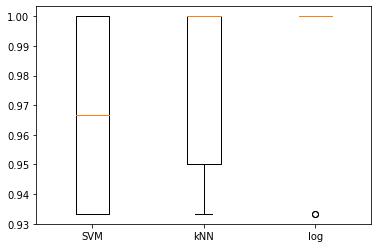

In [21]:
fig, ax = plt.subplots()
ax.boxplot(results)
ax.set_xticklabels(labels)

well here you have it, everybody is pretty much perfect :D

## Appendix

A function to color the boundaries according to the predictions (only uses 2D though). Meant to help with visualising how the estimators have solved the classification problem. Definitely works for k-means, probably works for SVM and log-reg too. Feel free to play around!

In [22]:
def plot_boundaries(X, estimator, h=0.02, ax=None, cmap=None):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    if ax is None:
        fig, ax = plt.subplots()
        
    if cmap is None:
        color_names = np.array(list(matplotlib.colors.CSS4_COLORS.keys()))
        keep = np.random.randint(0, len(color_names), size=len(k_neighb.classes_))
        cmap = ListedColormap(color_names[keep])
    ax.pcolormesh(xx, yy, Z, cmap=cmap)

In [24]:
# Create color maps for data points
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Create color maps for background
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])

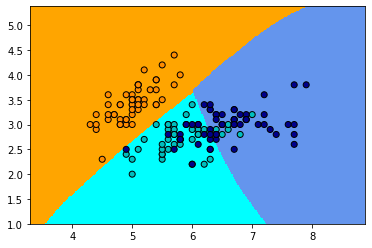

In [25]:
svc.fit(X[:, :2], y)

fig, ax = plt.subplots()
plot_boundaries(X[:, :2], svc, ax=ax, cmap=cmap_light)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')

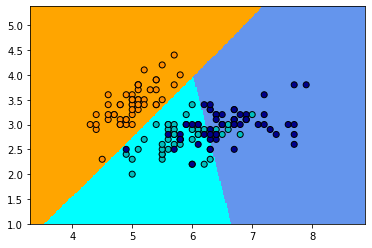

In [26]:
log.fit(X[:, :2], y)

fig, ax = plt.subplots()
plot_boundaries(X[:, :2], log, ax=ax, cmap=cmap_light)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')

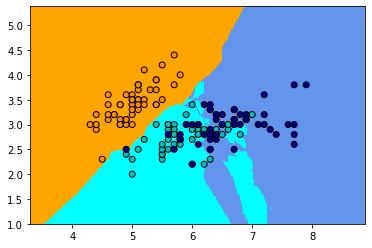

In [27]:
k_neighb.fit(X[:, :2], y)

fig, ax = plt.subplots()
plot_boundaries(X[:, :2], k_neighb, ax=ax, cmap=cmap_light)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')